<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [58]:
def sum_prod(X, V):
    n = len(X[0])
    p = len(X)
    sum = np.zeros((n, 1))

    for i in range(p):
        sum += X[i] @ V[i]

    return sum


matrixFirst = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
vectorFirst = [np.array([[1], [2]]), np.array([[3], [4]])]
resultFirst = np.array([[44], [64]])
assert np.array_equiv(sum_prod(matrixFirst, vectorFirst), resultFirst)


matrixSecond = [np.array([[7, 1], [6, 2]]), np.array([[4, 0], [0, 2]])]
vectorSecond = [np.array([[2], [2]]), np.array([[3], [4]])]
resultSecond = np.array([[28], [24]])
assert np.array_equiv(sum_prod(matrixSecond, vectorSecond), resultSecond)


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [14]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

M1 = np.array([[0.9, 0.7, 0.2], [1, 0.4, 5]])
assert np.all(binarize(M1) == np.array([[1, 1, 0], [1, 0, 1]]))

M2 = np.array([[8, 0.5, 0.3], [0.8, 0.1, 0.7]])
assert np.all(binarize(M2) == np.array([[1, 0, 0], [1, 0, 1]]))


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [42]:
def unique_rows(mat):
    return [np.unique(i) for i in mat]

def unique_columns(mat):
    return [np.unique(i) for i in mat.T]

mat1 = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
assert np.array_equal(unique_rows(mat1), [np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1, 2, 3])])
assert np.array_equal(unique_columns(mat1), [np.array([1]), np.array([2]), np.array([3])])


AssertionError: 

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

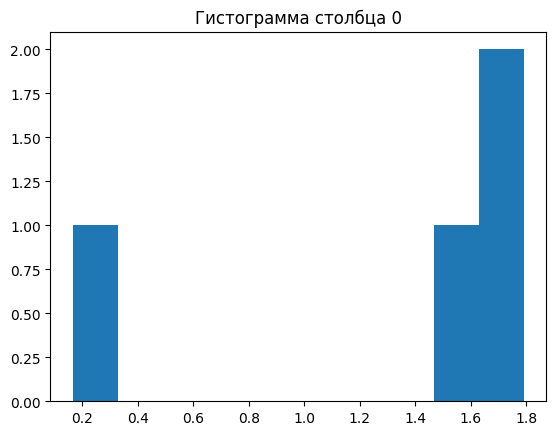

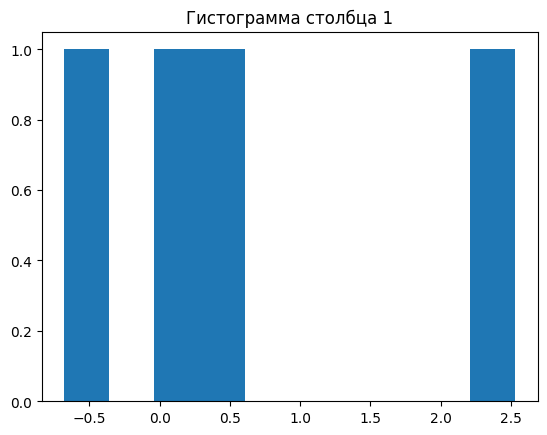

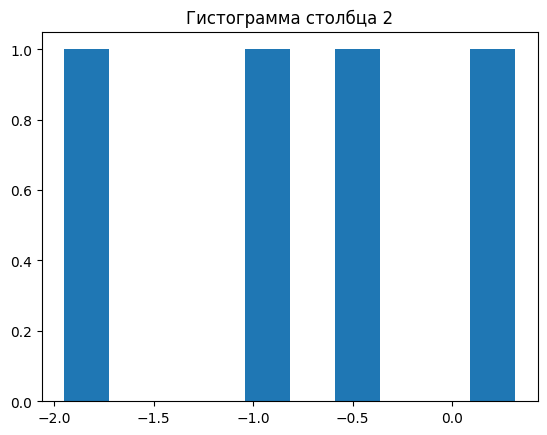

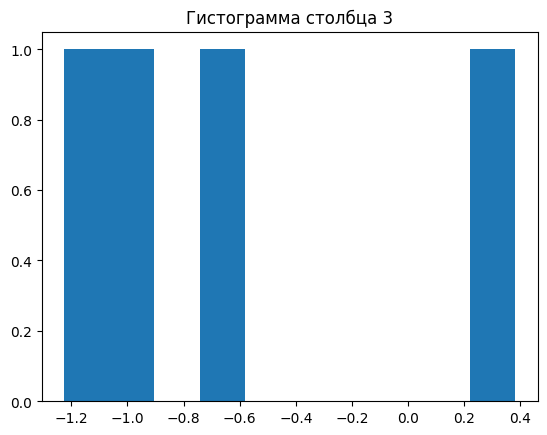

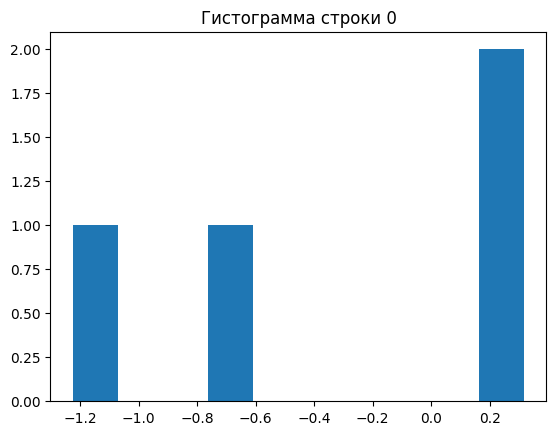

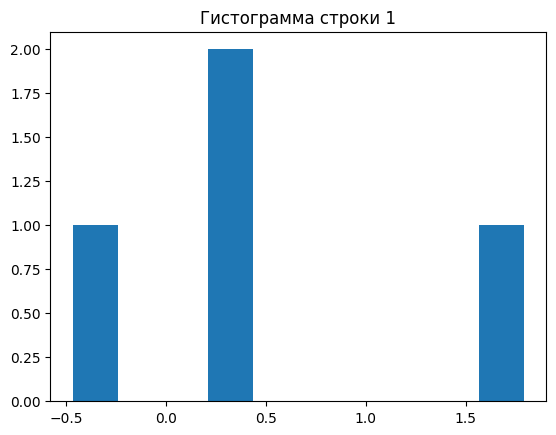

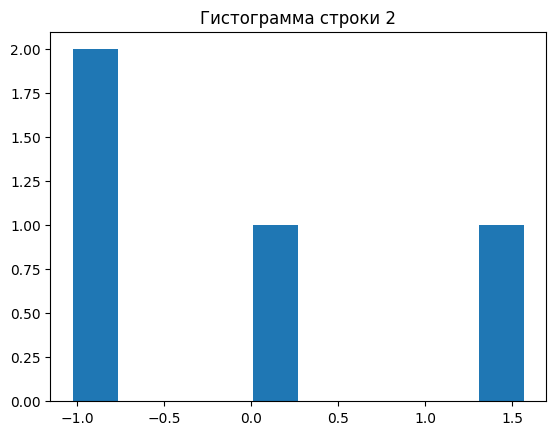

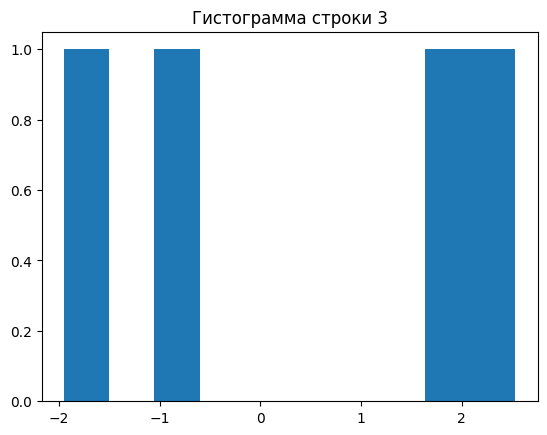

(array([[ 0.16680355, -0.67895413,  0.31730671, -1.22492216],
       [ 1.79197156,  0.32912875, -0.46683895,  0.38149456],
       [ 1.5672529 ,  0.26514242, -0.95524182, -1.02245546],
       [ 1.63519766,  2.53084602, -1.94879744, -0.64200821]]), array([ 1.29030642,  0.61154077, -0.76339288, -0.62697282]), array([0.42739398, 1.38721452, 0.67446145, 0.38279561]), array([-0.35494151,  0.50893898, -0.03632549,  0.39380951]), array([0.39649652, 0.66172224, 1.11980152, 3.16717381]))


In [44]:
def fill_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    columnMean = np.mean(matrix, axis=0)
    columnVar = np.var(matrix, axis=0)
    rowMean = np.mean(matrix, axis=1)
    rowVar = np.var(matrix, axis=1)

    for i in range(n):
        plt.hist(matrix[:, i], bins=10)
        plt.title(f"Гистограмма столбца {i}")
        plt.show()

    for i in range(m):
        plt.hist(matrix[i, :], bins=10)
        plt.title(f"Гистограмма строки {i}")
        plt.show()

    return matrix, columnMean, columnVar, rowMean, rowVar
print(fill_matrix(4, 4))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [47]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b

    return matrix

assert np.array_equal(chess(3, 3, 1, 2), np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]]))
assert np.array_equal(chess(4, 4, 0, 1), np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]))

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

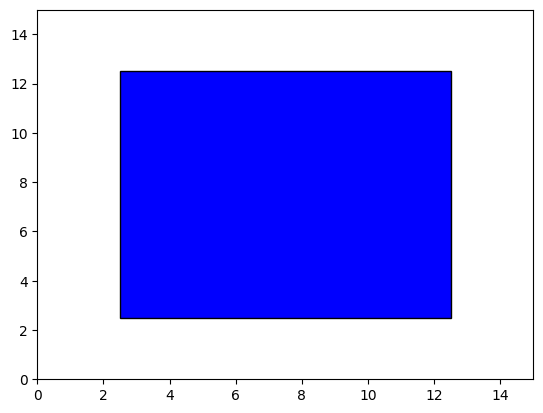

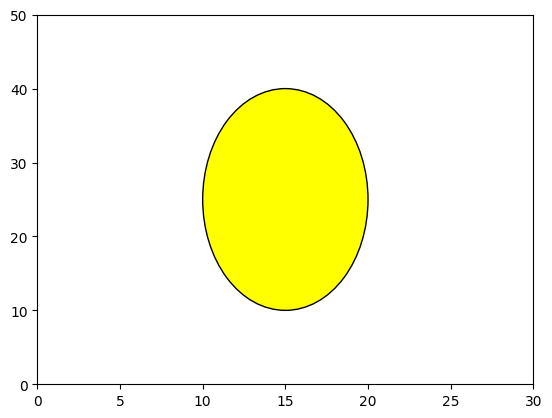

In [51]:
from matplotlib import patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(1)
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    ax.add_patch(patches.Rectangle((m / 2 - a / 2, n / 2 - b / 2), a, b, edgecolor="black", facecolor=rectangle_color))
    fig.patch.set_facecolor(background_color)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(1)
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    ax.add_patch(patches.Ellipse((m / 2, n / 2), a, b, edgecolor="black", facecolor=ellipse_color))
    fig.patch.set_facecolor(background_color)
    plt.show()

draw_rectangle(10, 10, 15, 15, "blue", "white")
draw_ellipse(10, 30, 30, 50, "yellow", "white")

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
def analyze_time_series(data, p):
    mean = np.mean(data)
    variance = np.var(data)
    std = np.std(data)
    localMaxima = np.argwhere(np.diff(np.sign(np.diff(data))) == -2) + 1
    localMinima = np.argwhere(np.diff(np.sign(np.diff(data))) == 2) + 1
    movingAverage = np.convolve(data, np.ones(p) / p, mode='valid')

    return mean, variance, std, localMaxima, localMinima, movingAverage

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]